In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bankmarketing/bankmarketing.csv


In [2]:
from pandasql import sqldf

# Define a reusable function for running SQL queries
run_query = lambda query: sqldf(query, globals())

# **Let's assume this as coding practice**

## 1. Data Accessing

In [3]:
marketing = pd.read_csv('/kaggle/input/bankmarketing/bankmarketing.csv')
marketing.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


There are 20 default attributes available in this dataset. It contained:
* around 41 thousands row of data points, and none of them contains null values
* Data Types: 5 -> float64, 5 -> int 64 and 10 -> object
* 6.6MB+ memory usage

In [4]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

It's discovered that some of the attributes contains negative values, this is something new from technical perspective.

In [5]:
marketing.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


The breakdown of numbers of unique values for each attributes:

In [6]:
marketing.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [7]:
marketing.mean(numeric_only=True).round(2)

age                 40.02
duration           258.29
campaign             2.57
pdays              962.48
previous             0.17
emp.var.rate         0.08
cons.price.idx      93.58
cons.conf.idx      -40.50
euribor3m            3.62
nr.employed       5167.04
dtype: float64

In [8]:
index = marketing.columns
index

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [9]:
# To determine if there is any duplicate columns at index
marketing.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

### 1.0 Data Cleaning

In [10]:
marketing.duplicated()


0        False
1        False
2        False
3        False
4        False
         ...  
41183    False
41184    False
41185    False
41186    False
41187    False
Length: 41188, dtype: bool

There were 12 rows of duplicated rows of records detected and identified.

In [11]:
marketing.duplicated().sum()

12

In [12]:
# Reference: https://www.youtube.com/watch?v=g8o7zjeL3js&t=238s
duplicated_rows = marketing[marketing.duplicated()]
duplicated_rows


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [13]:

marketing_cleaned = marketing.drop_duplicates()
marketing_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

### 1.1 Age
There isn't any age between 17 to 98 not discoverable in this dataset.

In [14]:
var = marketing['age'].unique()
sorted_var = np.sort(var)
print(sorted_var)
print(f"Data Type： {sorted_var.dtype}")

[17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88
 89 91 92 94 95 98]
Data Type： int64


In [15]:
var.min()

17

In [16]:
var.max()

98

In [17]:
query_1 = """
SELECT age AS Age, COUNT(*) AS Ordered_Age_Counts
FROM marketing
GROUP BY age
ORDER BY age ASC;
"""
result_1 = run_query(query_1)
print(result_1)

    Age  Ordered_Age_Counts
0    17                   5
1    18                  28
2    19                  42
3    20                  65
4    21                 102
..  ...                 ...
73   91                   2
74   92                   4
75   94                   1
76   95                   1
77   98                   2

[78 rows x 2 columns]


In [18]:
import plotly.express as px

# fig = px.box(result_1, x="Age", y="Ordered_Age_Counts", color="Indicator")
# fig.update_traces(quartilemethod="inclusive") # or "inclusive", or "linear" by default
# fig.show()

fig = px.bar(result_1, x="Age", y="Ordered_Age_Counts", 
             title="Age Distribution")
fig.show()

In [19]:
'''
https://www.linkedin.com/pulse/categorizing-age-ranges-sql-python-r-power-bi-ms-excel-anyaegbu-kyd9f/
'''
query_1 = """
SELECT *,  
    CASE WHEN age BETWEEN 0 AND 17 THEN '0-17 Underage'
         WHEN age BETWEEN 18 AND 32 THEN '18-32 Young Adulthood' 
         WHEN age BETWEEN 33 AND 45 THEN '33-45 Adulthood'
         WHEN age BETWEEN 46 AND 65 THEN '46-65 Senior Adult'
         WHEN age BETWEEN 66 AND 75 THEN '66-75 Pre-retirement'
         ELSE '75+ Senior Citizen'
    END AS age_range
FROM marketing_cleaned;
"""
processed_marketing = run_query(query_1)
print(processed_marketing)

       age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41171   73      retired  married  professional.course       no     yes   no   
41172   46  blue-collar  married  professional.course       no      no   no   
41173   56      retired  married    university.degree       no     yes   no   
41174   44   technician  married  professional.course       no      no   no   
41175   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  pdays  pre

In [20]:
processed_marketing.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_range
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,46-65 Senior Adult
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,46-65 Senior Adult
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,33-45 Adulthood
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,33-45 Adulthood
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,46-65 Senior Adult


In [21]:
query_1 = """
SELECT age_range, COUNT(age_range) AS Ordered_Age_Counts
FROM processed_marketing
GROUP BY age_range
ORDER BY age_range ASC;
"""
result_1 = run_query(query_1)
print(result_1)

               age_range  Ordered_Age_Counts
0          0-17 Underage                   5
1  18-32 Young Adulthood               11168
2        33-45 Adulthood               18175
3     46-65 Senior Adult               11210
4   66-75 Pre-retirement                 373
5     75+ Senior Citizen                 245


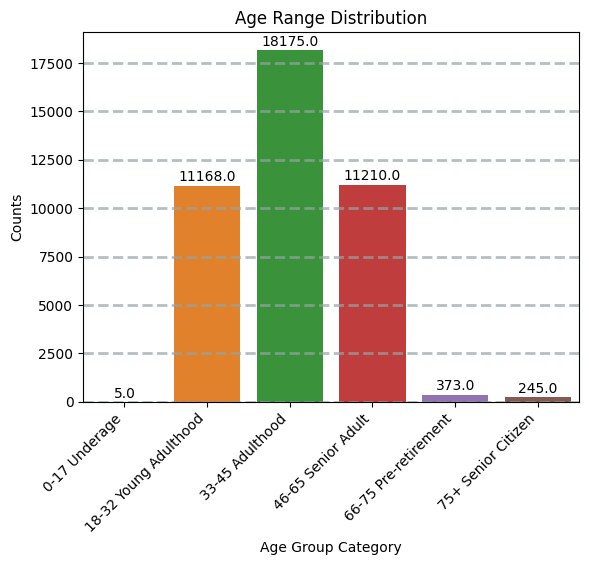

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt


splot = sns.barplot(data=result_1, x='age_range', y='Ordered_Age_Counts')

# https://www.geeksforgeeks.org/python/how-to-annotate-bars-in-grouped-barplot-in-python/
for p in splot.patches:
    splot.annotate(format(p.get_height()),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 6),
                   textcoords='offset points')
    
#rotate x-axis labels
plt.xticks(rotation=45, ha='right')

plt.xlabel('Age Group Category')
plt.ylabel('Counts')
plt.title('Age Range Distribution')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()

### 1.2 Job
12 jobs were discovered in this dataset, such as:

In [23]:
var = marketing['job'].unique()
print(var)
print(f"Data Type： {var.dtype}")

['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Data Type： object


In [24]:
query_1 = """
SELECT job as Job, COUNT(*) AS Ordered_Counts
FROM processed_marketing
GROUP BY job
ORDER BY job, Ordered_Counts DESC;
"""
result_1 = run_query(query_1)
print(result_1)

              Job  Ordered_Counts
0          admin.           10419
1     blue-collar            9253
2    entrepreneur            1456
3       housemaid            1060
4      management            2924
5         retired            1718
6   self-employed            1421
7        services            3967
8         student             875
9      technician            6739
10     unemployed            1014
11        unknown             330


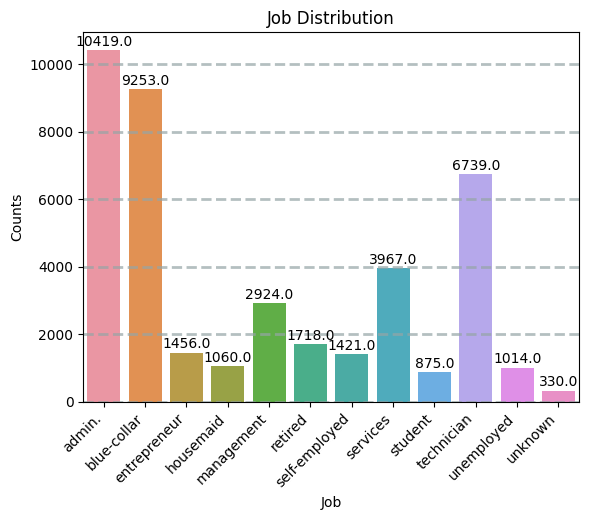

In [25]:
splot = sns.barplot(data=result_1, x='Job', y='Ordered_Counts') 

for p in splot.patches:
    splot.annotate(format(p.get_height()),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 6),
                   textcoords='offset points')

#rotate x-axis labels
plt.xticks(rotation=45, ha='right')
plt.xlabel('Job')
plt.ylabel('Counts')
plt.title('Job Distribution')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()

### 1.3 Marital

In [26]:
var = marketing['marital'].unique()
print(var)
print(f"Data Type： {var.dtype}")

['married' 'single' 'divorced' 'unknown']
Data Type： object


In [27]:
query_1 = """
SELECT marital as Marital, COUNT(*) AS Ordered_Counts
FROM processed_marketing
GROUP BY marital
ORDER BY marital ASC, Ordered_Counts DESC;
"""
result_1 = run_query(query_1)
print(result_1)

    Marital  Ordered_Counts
0  divorced            4611
1   married           24921
2    single           11564
3   unknown              80


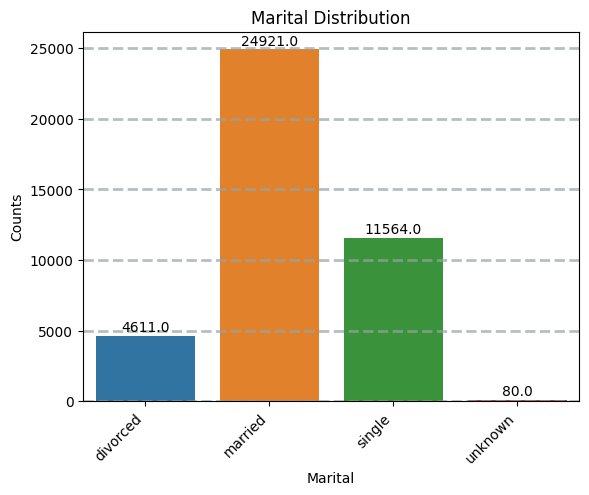

In [28]:
splot = sns.barplot(data=result_1, x='Marital', y='Ordered_Counts') 

for p in splot.patches:
    splot.annotate(format(p.get_height()),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 6),
                   textcoords='offset points')

#rotate x-axis labels
plt.xticks(rotation=45, ha='right')
plt.xlabel('Marital')
plt.ylabel('Counts')
plt.title('Marital Distribution')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()

### 1.4 Education

In [29]:
processed_marketing['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [30]:
query_1 = """
SELECT education as Education, COUNT(*) AS Ordered_Counts
FROM processed_marketing
GROUP BY education
ORDER BY education ASC, Ordered_Counts DESC;
"""
result_1 = run_query(query_1)
print(result_1)

             Education  Ordered_Counts
0             basic.4y            4176
1             basic.6y            2291
2             basic.9y            6045
3          high.school            9512
4           illiterate              18
5  professional.course            5240
6    university.degree           12164
7              unknown            1730


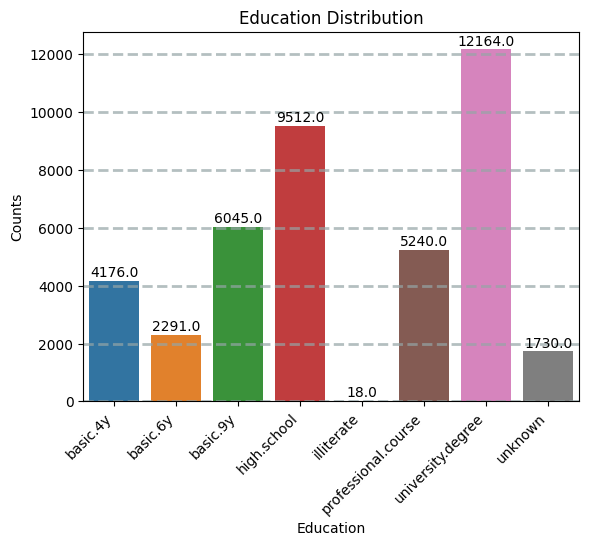

In [31]:
splot = sns.barplot(data=result_1, x='Education', y='Ordered_Counts') 

for p in splot.patches:
    splot.annotate(format(p.get_height()),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 6),
                   textcoords='offset points')
    
#rotate x-axis labels
plt.xticks(rotation=45, ha='right')
plt.xlabel('Education')
plt.ylabel('Counts')
plt.title('Education Distribution')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()

### 1.5 Default

In [32]:
processed_marketing['default'].unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [33]:
processed_marketing['default'].nunique()

3

In [34]:
query_1 = """
SELECT `default` AS Status, COUNT(*) AS Ordered_Counts
FROM processed_marketing
GROUP BY `default`
ORDER BY `default` ASC;
"""
result_1 = run_query(query_1)
print(result_1)

    Status  Ordered_Counts
0       no           32577
1  unknown            8596
2      yes               3


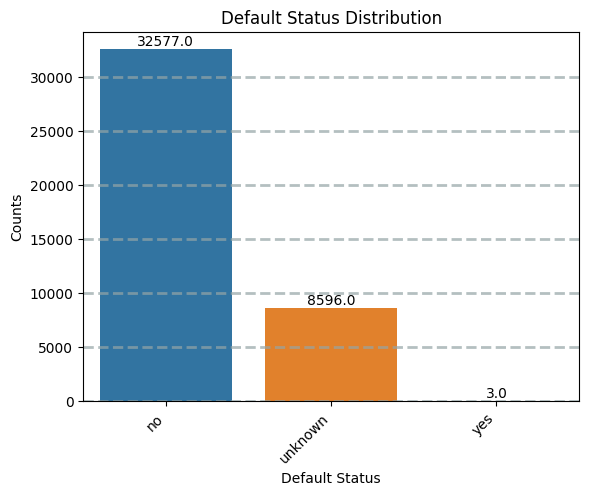

In [35]:
splot = sns.barplot(data=result_1, x='Status', y='Ordered_Counts') 

for p in splot.patches:
    splot.annotate(format(p.get_height()),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 6),
                   textcoords='offset points')

#rotate x-axis labels
plt.xticks(rotation=45, ha='right')
plt.xlabel('Default Status')
plt.ylabel('Counts')
plt.title('Default Status Distribution')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()

### 1.6 Housing

In [36]:
processed_marketing['housing'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [37]:
query_1 = """
SELECT housing AS Housing, COUNT(*) AS Ordered_Counts
FROM processed_marketing
GROUP BY housing
ORDER BY housing ASC;
"""
result_1 = run_query(query_1)
print(result_1)

   Housing  Ordered_Counts
0       no           18615
1  unknown             990
2      yes           21571


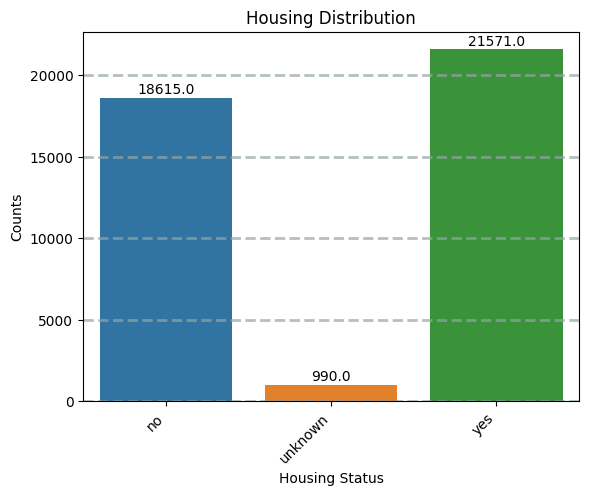

In [38]:
splot = sns.barplot(data=result_1, x='Housing', y='Ordered_Counts') 

for p in splot.patches:
    splot.annotate(format(p.get_height()),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 6),
                   textcoords='offset points')

#rotate x-axis labels
plt.xticks(rotation=45, ha='right')
plt.xlabel('Housing Status')
plt.ylabel('Counts')
plt.title('Housing Distribution')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()

### 1.7 Loan

In [39]:
processed_marketing['loan'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [40]:
query_1 = """
SELECT housing AS Housing, COUNT(*) AS Ordered_Counts
FROM processed_marketing
GROUP BY housing
ORDER BY housing ASC;
"""
result_1 = run_query(query_1)
print(result_1)

   Housing  Ordered_Counts
0       no           18615
1  unknown             990
2      yes           21571


### 1.8 Contact

In [41]:
processed_marketing['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

In [42]:
query_1 = """
SELECT housing AS Housing, COUNT(*) AS Ordered_Counts
FROM processed_marketing
GROUP BY housing
ORDER BY housing ASC;
"""
result_1 = run_query(query_1)
print(result_1)

   Housing  Ordered_Counts
0       no           18615
1  unknown             990
2      yes           21571


### 1.9 Month

This dataset seems containing data from April to December only, can we assume this as the subset of another dataset?

In [43]:
processed_marketing['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [44]:
query_1 = """
SELECT month AS Month, COUNT(*) AS Ordered_Counts
FROM processed_marketing
GROUP BY month
ORDER BY Ordered_Counts DESC;
"""
result_1 = run_query(query_1)
print(result_1)

  Month  Ordered_Counts
0   may           13767
1   jul            7169
2   aug            6176
3   jun            5318
4   nov            4100
5   apr            2631
6   oct             717
7   sep             570
8   mar             546
9   dec             182


### 1.10 day_of_week

In [45]:
processed_marketing['day_of_week'].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [46]:
query_1 = """
SELECT day_of_week AS `Day of Week`, COUNT(*) AS Ordered_Counts
FROM processed_marketing
GROUP BY day_of_week
ORDER BY day_of_week ASC;
"""
result_1 = run_query(query_1)
print(result_1)

  Day of Week  Ordered_Counts
0         fri            7826
1         mon            8512
2         thu            8618
3         tue            8086
4         wed            8134


### 1.11 Duration

In [47]:
var = processed_marketing['duration'].unique()
print(var)
print(f"Data Type： {var.dtype}")

[ 261  149  226 ... 1246 1556 1868]
Data Type： int64


In [48]:
query_1 = """
SELECT duration AS Duration, COUNT(*) AS Ordered_Counts
FROM processed_marketing
GROUP BY duration
ORDER BY duration ASC;
"""
result_1 = run_query(query_1)
print(result_1)

      Duration  Ordered_Counts
0            0               4
1            1               3
2            2               1
3            3               3
4            4              12
...        ...             ...
1539      3631               1
1540      3643               1
1541      3785               1
1542      4199               1
1543      4918               1

[1544 rows x 2 columns]


In [49]:
processed_marketing[['duration']].nunique()

duration    1544
dtype: int64

In [50]:
processed_marketing[['duration']].min()

duration    0
dtype: int64

In [51]:
processed_marketing[['duration']].max()

duration    4918
dtype: int64

In [52]:
processed_marketing[['duration']].mean().round(2)

duration    258.32
dtype: float64

In [53]:
processed_marketing[['duration']].describe()

,duration
count,41176.000000
mean,258.315815
std,259.305321
min,0.000000
25%,102.000000
50%,180.000000
75%,319.000000
max,4918.000000


In [54]:
query_1 = """
SELECT *,  
    CASE WHEN duration BETWEEN 0 AND 120 THEN '0-2 Minutes Short Call'
         WHEN duration BETWEEN 121 AND 240 THEN '2-4 Minutes Medium Call' 
         WHEN duration BETWEEN 241 AND 480 THEN '4-8 Minutes Medium Long Call'
         WHEN duration BETWEEN 481 AND 960 THEN '8-16 Minutes Long Call'
         ELSE 'More Than 16 Minutes Potency call'
    END AS call_duration
FROM processed_marketing;
"""
processed_marketing = run_query(query_1)
print(processed_marketing)

       age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41171   73      retired  married  professional.course       no     yes   no   
41172   46  blue-collar  married  professional.course       no      no   no   
41173   56      retired  married    university.degree       no     yes   no   
41174   44   technician  married  professional.course       no      no   no   
41175   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  previous  

In [55]:
query_1 = """
SELECT call_duration AS `Call Duration`, COUNT(*) AS Ordered_Counts
FROM processed_marketing
GROUP BY call_duration
ORDER BY call_duration ASC;
"""
result_1 = run_query(query_1)
print(result_1)

                       Call Duration  Ordered_Counts
0             0-2 Minutes Short Call           12912
1            2-4 Minutes Medium Call           13259
2       4-8 Minutes Medium Long Call            9717
3             8-16 Minutes Long Call            4214
4  More Than 16 Minutes Potency call            1074


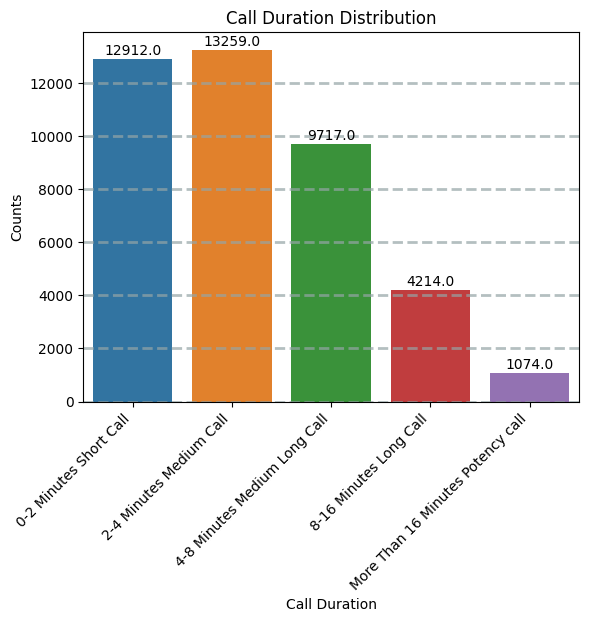

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt 

splot = sns.barplot(data=result_1, x='Call Duration', y='Ordered_Counts') 

for p in splot.patches:
    splot.annotate(format(p.get_height()),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 6),
                   textcoords='offset points')

#rotate x-axis labels
plt.xticks(rotation=45, ha='right')
plt.xlabel('Call Duration')
plt.ylabel('Counts')
plt.title('Call Duration Distribution')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()

### 1.12 Campaign

In [57]:
var = np.sort(
    marketing['campaign'].unique()
)
print(var)
print(f"Data Type： {var.dtype}")

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 37 39 40 41 42 43 56]
Data Type： int64


### 1.13 pdays

In [58]:
var = np.sort(
    marketing['pdays'].unique()
)
print(var)
print(f"Data Type： {var.dtype}")

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  25  26  27 999]
Data Type： int64


In [59]:
var = marketing['previous'].unique()
print(var)
print(f"Data Type： {var.dtype}")

[0 1 2 3 4 5 6 7]
Data Type： int64


In [60]:
marketing['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [61]:
var = np.sort(
    marketing['emp.var.rate'].unique()
)
print(var)
print(f"Data Type： {var.dtype}")

[-3.4 -3.  -2.9 -1.8 -1.7 -1.1 -0.2 -0.1  1.1  1.4]
Data Type： float64


In [62]:
var = np.sort(
    marketing['cons.price.idx'].unique()
)
print(var)
print(f"Data Type： {var.dtype}")

[92.201 92.379 92.431 92.469 92.649 92.713 92.756 92.843 92.893 92.963
 93.075 93.2   93.369 93.444 93.749 93.798 93.876 93.918 93.994 94.027
 94.055 94.199 94.215 94.465 94.601 94.767]
Data Type： float64


In [63]:
var = np.sort(
    marketing['cons.conf.idx'].unique()
)
print(var)
print(f"Data Type： {var.dtype}")

[-50.8 -50.  -49.5 -47.1 -46.2 -45.9 -42.7 -42.  -41.8 -40.8 -40.4 -40.3
 -40.  -39.8 -38.3 -37.5 -36.4 -36.1 -34.8 -34.6 -33.6 -33.  -31.4 -30.1
 -29.8 -26.9]
Data Type： float64


In [64]:
var = np.sort(
    marketing['euribor3m'].unique()
)

print(var)
print(f"Data Type： {var.dtype}")

[0.634 0.635 0.636 0.637 0.638 0.639 0.64  0.642 0.643 0.644 0.645 0.646
 0.649 0.65  0.651 0.652 0.653 0.654 0.655 0.659 0.663 0.668 0.672 0.677
 0.682 0.683 0.684 0.685 0.688 0.69  0.692 0.695 0.697 0.699 0.7   0.701
 0.702 0.704 0.706 0.707 0.708 0.709 0.71  0.711 0.712 0.713 0.714 0.715
 0.716 0.717 0.718 0.719 0.72  0.721 0.722 0.723 0.724 0.727 0.728 0.729
 0.73  0.731 0.732 0.733 0.735 0.737 0.739 0.74  0.741 0.742 0.743 0.744
 0.748 0.749 0.75  0.752 0.753 0.754 0.755 0.761 0.762 0.766 0.767 0.768
 0.77  0.771 0.773 0.778 0.781 0.782 0.788 0.79  0.793 0.797 0.802 0.803
 0.809 0.81  0.813 0.819 0.821 0.822 0.825 0.827 0.829 0.834 0.835 0.838
 0.84  0.843 0.846 0.849 0.851 0.854 0.859 0.861 0.869 0.87  0.873 0.876
 0.877 0.878 0.879 0.88  0.881 0.882 0.883 0.884 0.885 0.886 0.888 0.889
 0.89  0.891 0.893 0.894 0.895 0.896 0.898 0.899 0.9   0.903 0.904 0.905
 0.908 0.914 0.921 0.927 0.933 0.937 0.942 0.944 0.953 0.956 0.959 0.965
 0.969 0.972 0.977 0.979 0.982 0.985 0.987 0.993 0.

In [65]:
var = np.sort(
    marketing['nr.employed'].unique()
)
print(var)
print(f"Data Type： {var.dtype}")

[4963.6 4991.6 5008.7 5017.5 5023.5 5076.2 5099.1 5176.3 5191.  5195.8
 5228.1]
Data Type： float64


In [66]:
marketing['y'].unique()

array(['no', 'yes'], dtype=object)

In [67]:
query_1 = """
SELECT y AS Indicator, COUNT(*) AS Ordered_Counts
FROM processed_marketing
GROUP BY y
ORDER BY y ASC;
"""
result_1 = run_query(query_1)
print(result_1)

  Indicator  Ordered_Counts
0        no           36537
1       yes            4639


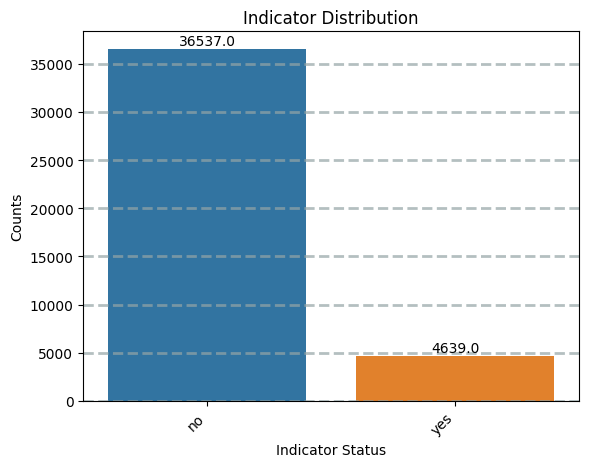

In [68]:
splot = sns.barplot(data=result_1, x='Indicator', y='Ordered_Counts') 

for p in splot.patches:
    splot.annotate(format(p.get_height()),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 6),
                   textcoords='offset points')

#rotate x-axis labels
plt.xticks(rotation=45, ha='right')
plt.xlabel('Indicator Status')
plt.ylabel('Counts')
plt.title('Indicator Distribution')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()

## 2. EDA

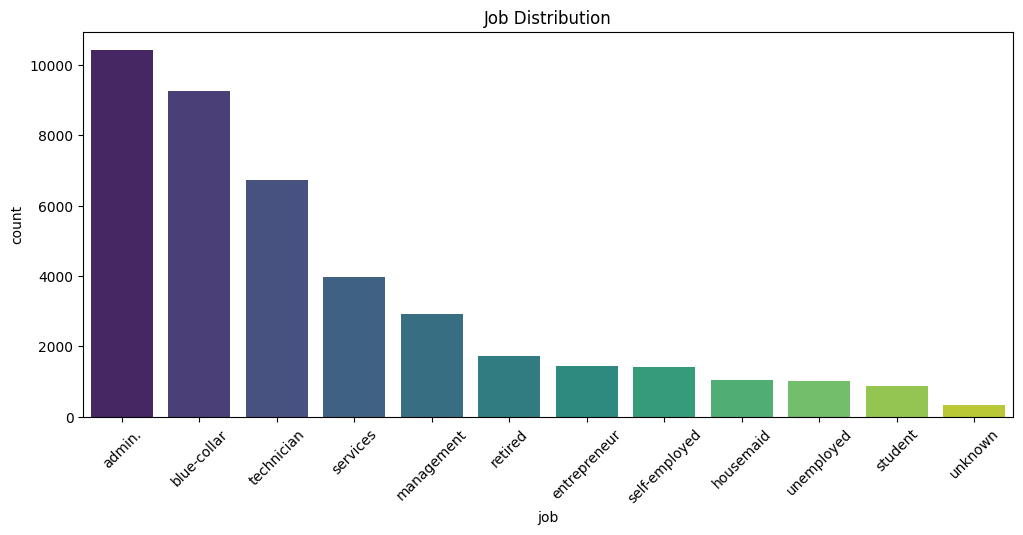

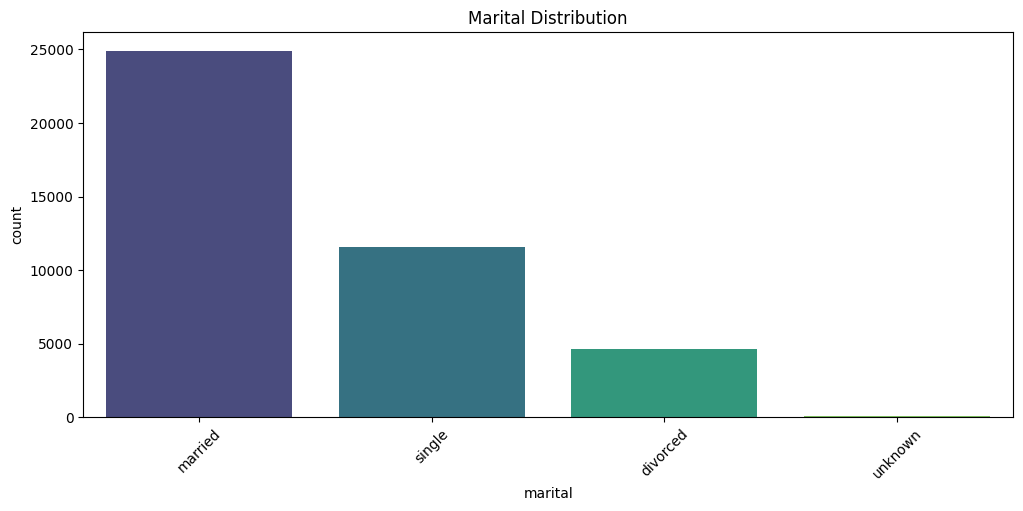

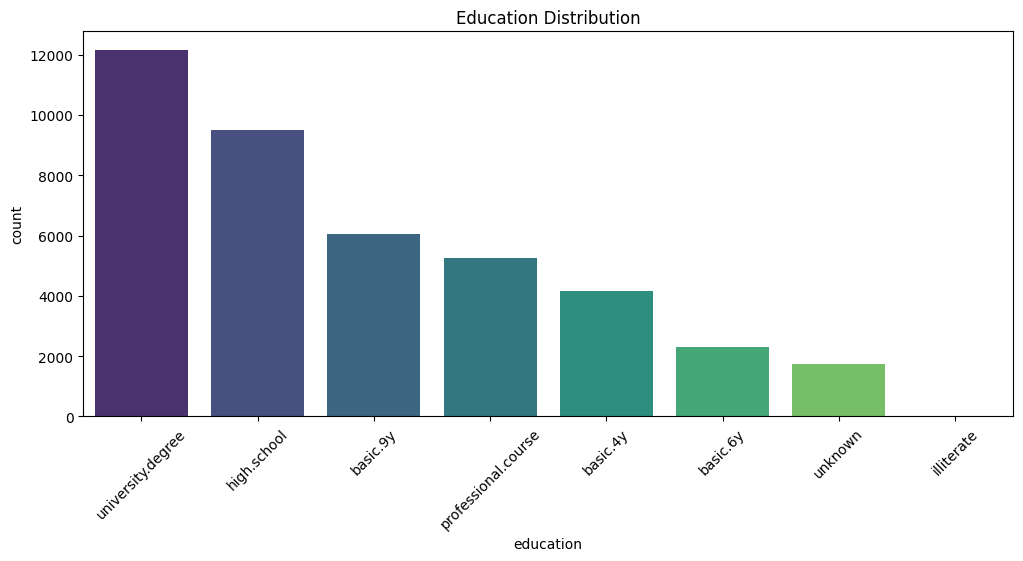

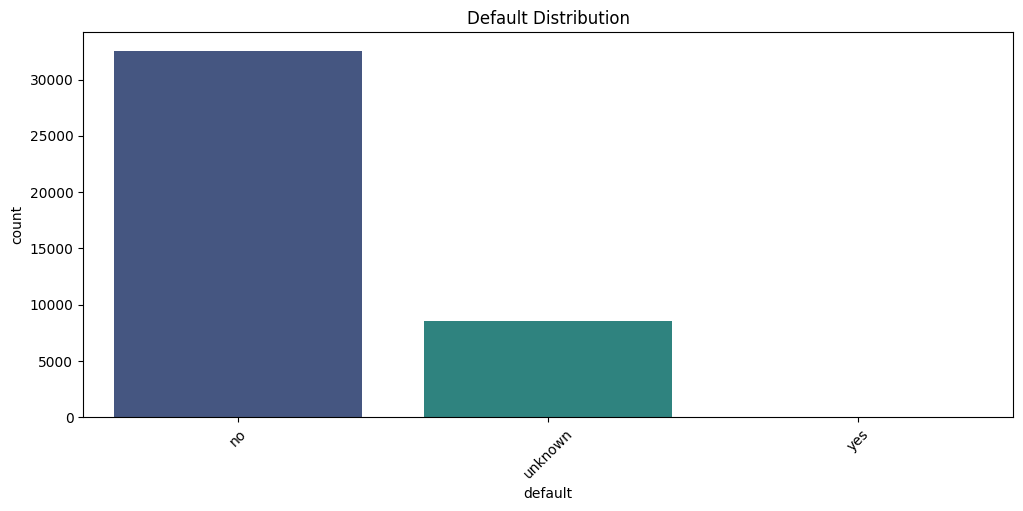

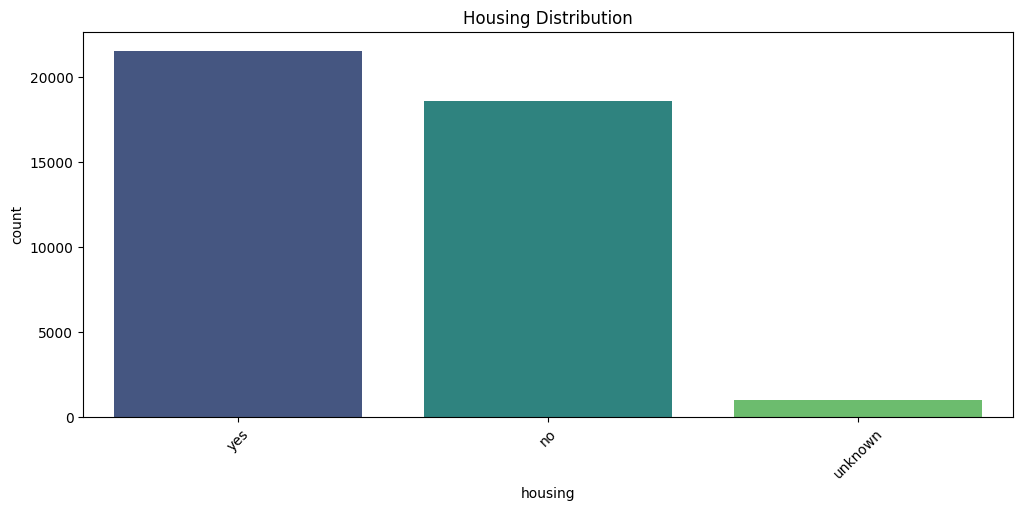

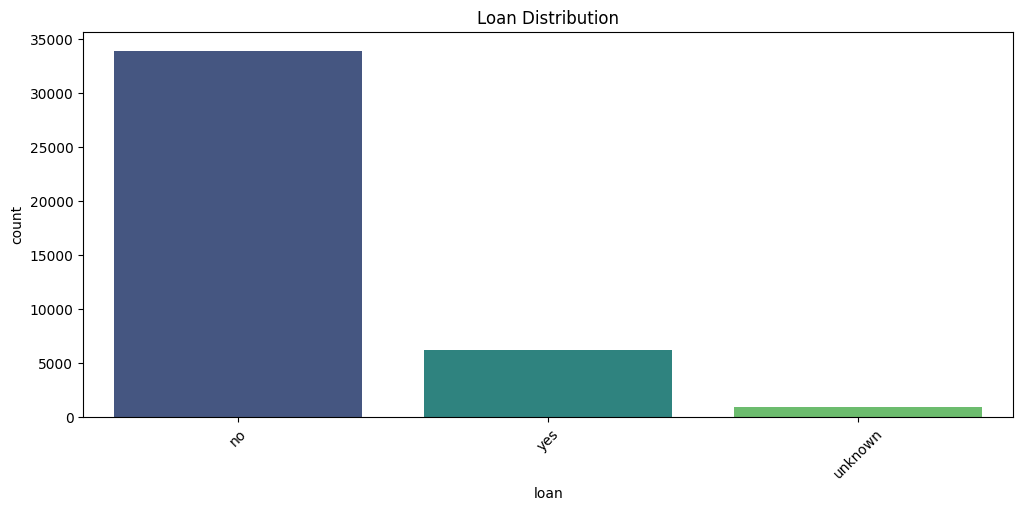

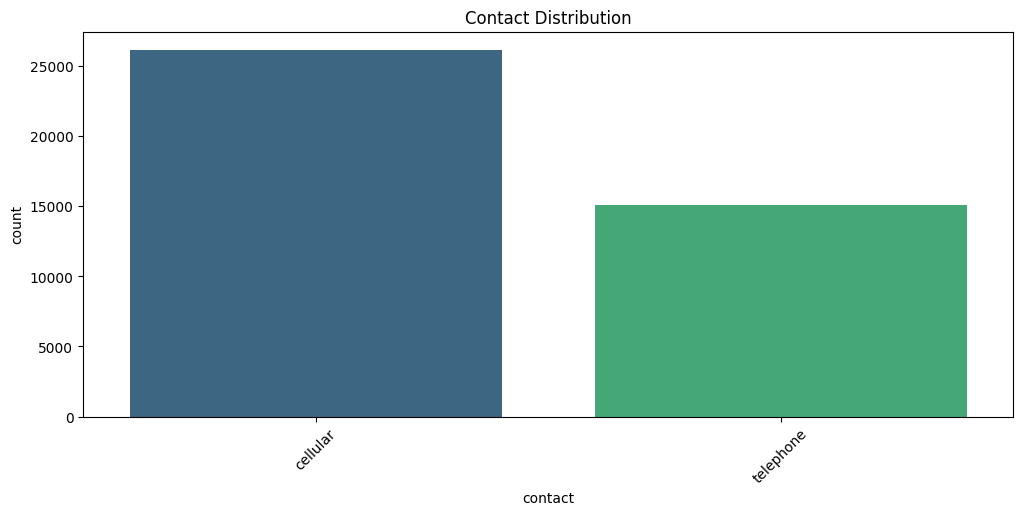

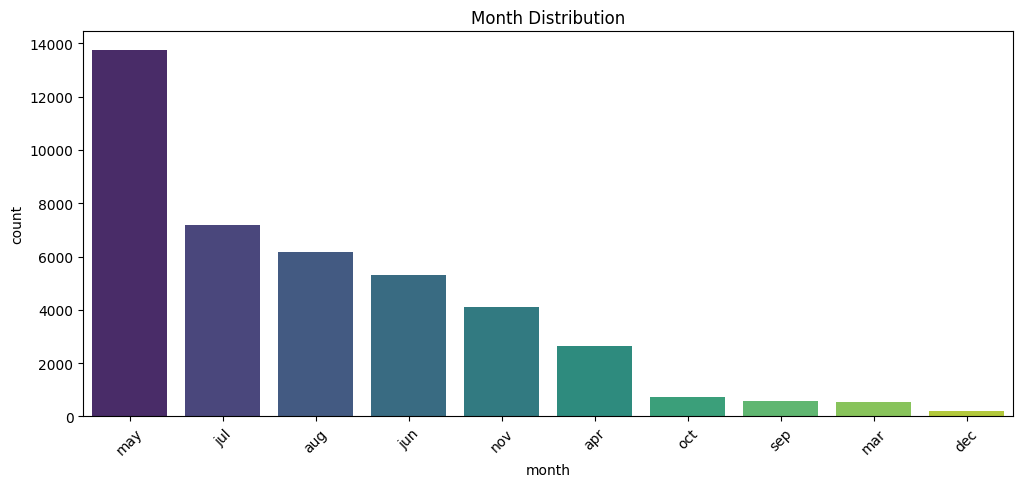

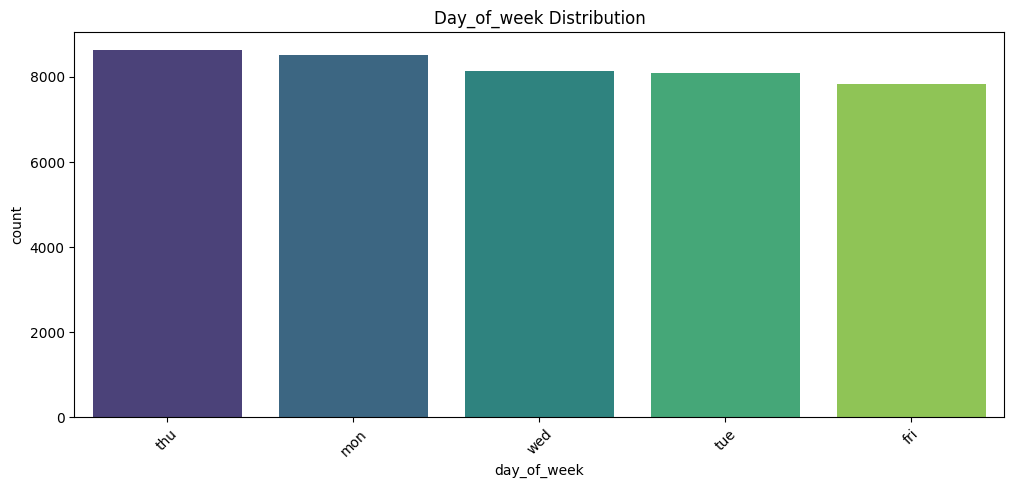

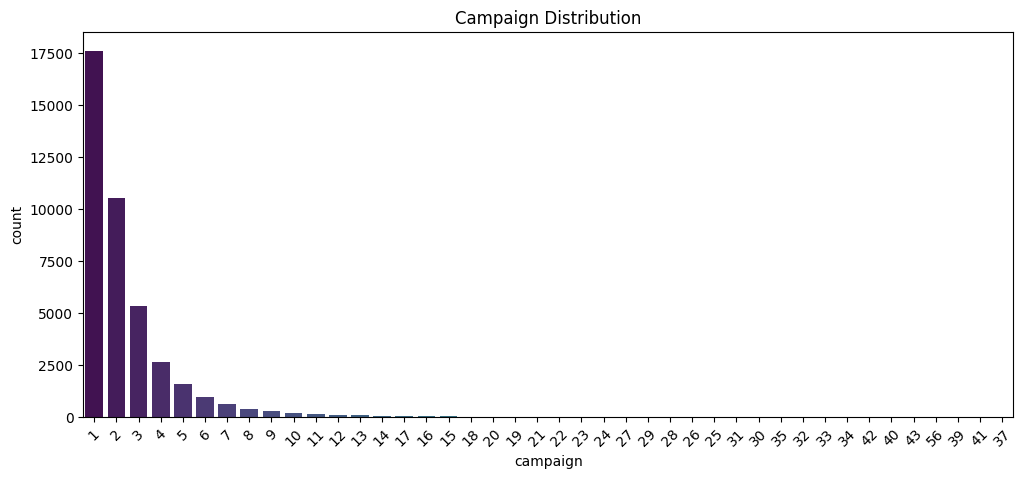

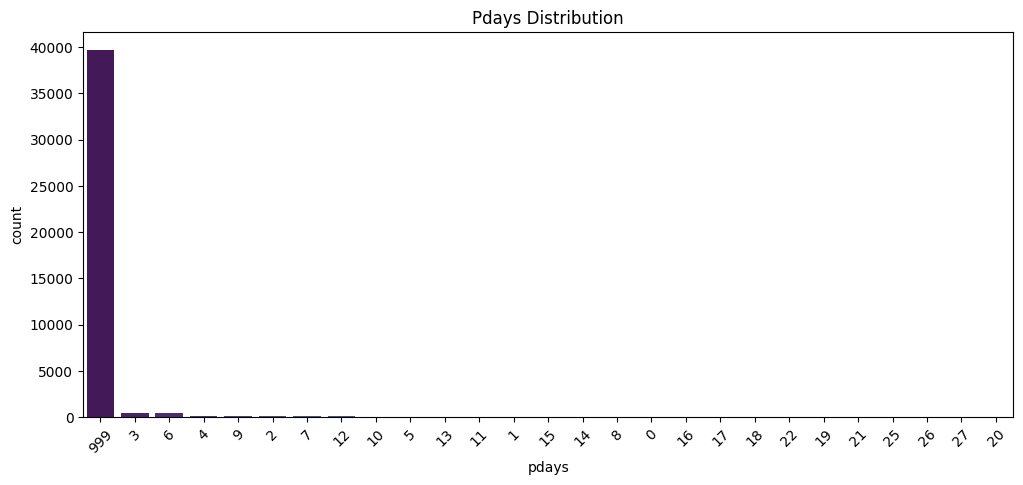

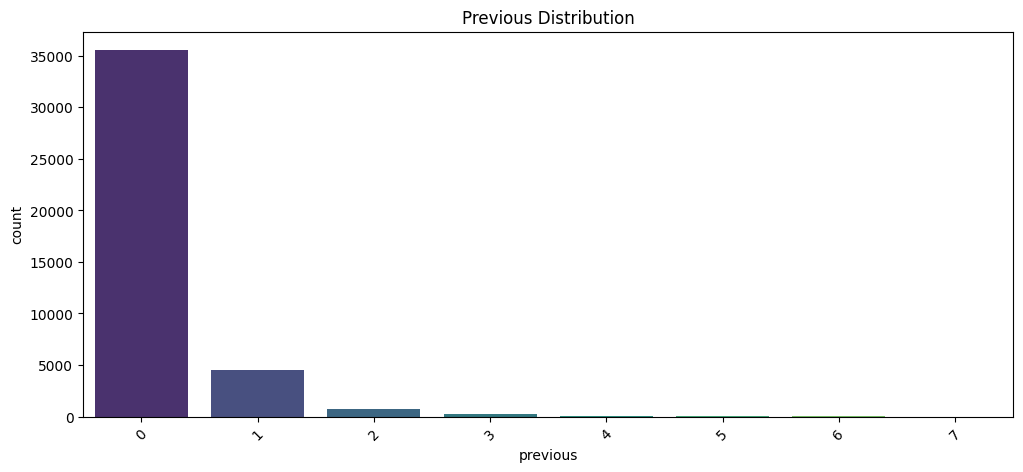

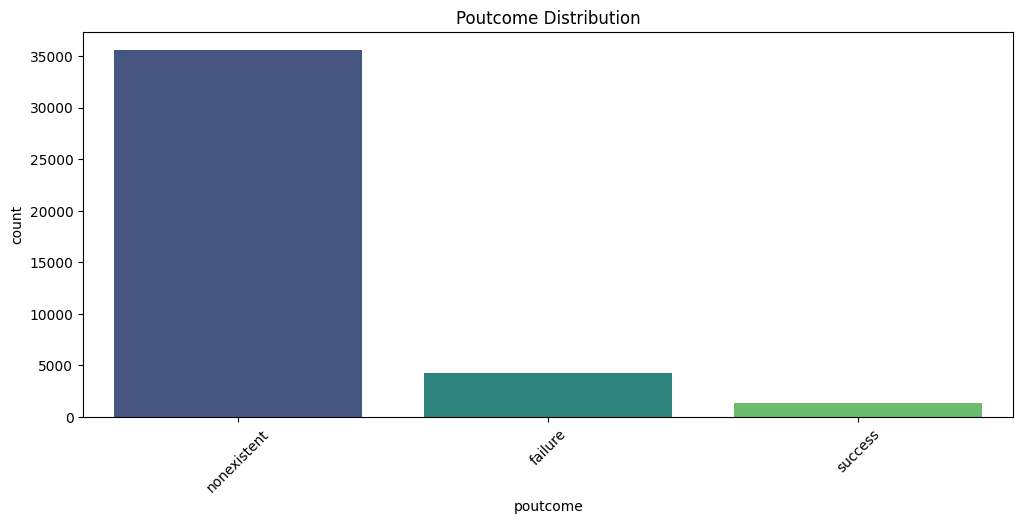

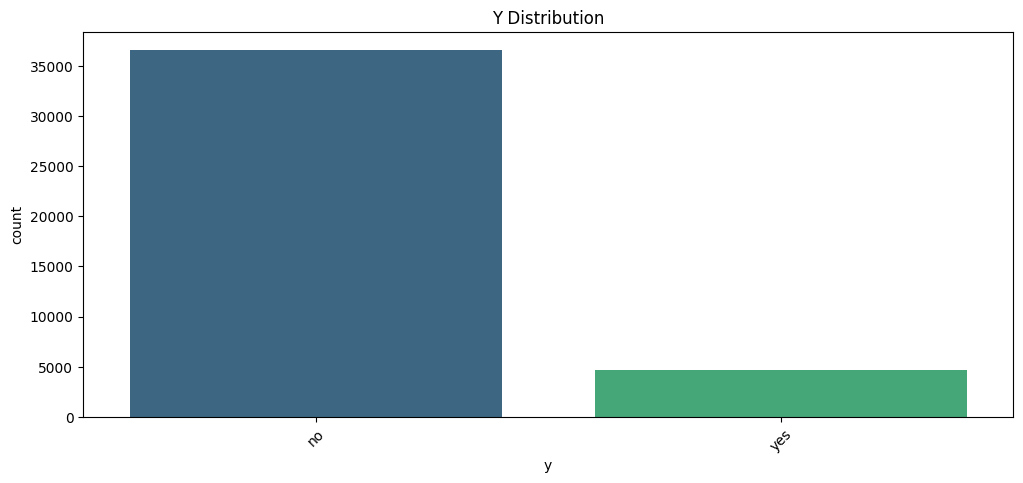

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt 

cat_cols = [
    'job', 
    'marital', 
    'education', 
    'default', 
    'housing', 
    'loan',
    'contact', 
    'month', 
    'day_of_week',  
    'campaign', 
    'pdays',
    'previous',
    'poutcome',
    'y'
]

for col in cat_cols:
    plt.figure(figsize=(12,5))
    order = marketing_cleaned[col].value_counts().index
    sns.countplot(x=col, data=marketing_cleaned, order = order, palette="viridis")
    plt.title(f"{col.capitalize()} Distribution") #capitalize the first word
    plt.xticks(rotation=45)
    plt.show()

In [70]:
marketing_cleaned[['duration', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']].describe()

,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,258.315815,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,259.305321,1.570883,0.578839,4.627860,1.734437,72.251364
min,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,102.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,180.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,319.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,4918.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## 3. Data Preparation for Model Training

In [71]:
ml_marketing = processed_marketing.copy()
ml_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

In [72]:
# Scikit-learn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

ml_marketing["encoded_call_duration"] = le.fit_transform(ml_marketing['call_duration'])
ml_marketing["encoded_call_duration"].describe()

count    41176.000000
mean         1.205338
std          1.073101
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: encoded_call_duration, dtype: float64

In [73]:
from sklearn.preprocessing import LabelEncoder

ml_marketing["encoded_age_range"] = le.fit_transform(ml_marketing['age_range'])
ml_marketing["encoded_age_range"].describe()

count    41176.000000
mean         2.036745
std          0.795241
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: encoded_age_range, dtype: float64

In [74]:
cols_to_encode = ['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'poutcome', 'day_of_week', 'y']

for col in cols_to_encode:
    ml_marketing[f"encoded_{col}"] = le.fit_transform(ml_marketing[col])
    print(ml_marketing[f"encoded_{col}"].info())


<class 'pandas.core.series.Series'>
RangeIndex: 41176 entries, 0 to 41175
Series name: encoded_job
Non-Null Count  Dtype
--------------  -----
41176 non-null  int64
dtypes: int64(1)
memory usage: 321.8 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 41176 entries, 0 to 41175
Series name: encoded_marital
Non-Null Count  Dtype
--------------  -----
41176 non-null  int64
dtypes: int64(1)
memory usage: 321.8 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 41176 entries, 0 to 41175
Series name: encoded_education
Non-Null Count  Dtype
--------------  -----
41176 non-null  int64
dtypes: int64(1)
memory usage: 321.8 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 41176 entries, 0 to 41175
Series name: encoded_default
Non-Null Count  Dtype
--------------  -----
41176 non-null  int64
dtypes: int64(1)
memory usage: 321.8 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 41176 entries, 0 to 41175
Series name: encoded_housing
Non-Null Count  Dtype
--------------  -----

In [75]:
ml_marketing['abs.emp.var.rate'] = abs(ml_marketing['emp.var.rate'])
ml_marketing['abs.emp.var.rate'].tail()

41171    1.1
41172    1.1
41173    1.1
41174    1.1
41175    1.1
Name: abs.emp.var.rate, dtype: float64

In [76]:
# https://bobbyhadz.com/blog/python-convert-negative-number-to-positive
ml_marketing['abs.cons.conf.idx'] = abs(ml_marketing['cons.conf.idx'])
ml_marketing['abs.cons.conf.idx'].tail()

41171    50.8
41172    50.8
41173    50.8
41174    50.8
41175    50.8
Name: abs.cons.conf.idx, dtype: float64

In [77]:
ml_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    41176 non-null  int64  
 1   job                    41176 non-null  object 
 2   marital                41176 non-null  object 
 3   education              41176 non-null  object 
 4   default                41176 non-null  object 
 5   housing                41176 non-null  object 
 6   loan                   41176 non-null  object 
 7   contact                41176 non-null  object 
 8   month                  41176 non-null  object 
 9   day_of_week            41176 non-null  object 
 10  duration               41176 non-null  int64  
 11  campaign               41176 non-null  int64  
 12  pdays                  41176 non-null  int64  
 13  previous               41176 non-null  int64  
 14  poutcome               41176 non-null  object 
 15  em

In [78]:
ml_marketing.tail().T

,41171,41172,41173,41174,41175
age,73,46,56,44,74
job,retired,blue-collar,retired,technician,retired
marital,married,married,married,married,married
education,professional.course,professional.course,university.degree,professional.course,professional.course
default,no,no,no,no,no
housing,yes,no,yes,no,yes
loan,no,no,no,no,no
contact,cellular,cellular,cellular,cellular,cellular
month,nov,nov,nov,nov,nov
day_of_week,fri,fri,fri,fri,fri


In [79]:
ml_index = ml_marketing.columns
ml_index

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'age_range',
       'call_duration', 'encoded_call_duration', 'encoded_age_range',
       'encoded_job', 'encoded_marital', 'encoded_education',
       'encoded_default', 'encoded_housing', 'encoded_loan', 'encoded_contact',
       'encoded_month', 'encoded_poutcome', 'encoded_day_of_week', 'encoded_y',
       'abs.emp.var.rate', 'abs.cons.conf.idx'],
      dtype='object')

In [80]:
ml_index = ml_marketing.columns = ml_marketing.columns.str.replace('.', '_')
ml_index

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y', 'age_range',
       'call_duration', 'encoded_call_duration', 'encoded_age_range',
       'encoded_job', 'encoded_marital', 'encoded_education',
       'encoded_default', 'encoded_housing', 'encoded_loan', 'encoded_contact',
       'encoded_month', 'encoded_poutcome', 'encoded_day_of_week', 'encoded_y',
       'abs_emp_var_rate', 'abs_cons_conf_idx'],
      dtype='object')

In [81]:
query_1 = """
SELECT age, 
       encoded_age_range, 
       encoded_job, 
       encoded_marital, 
       encoded_education, 
       encoded_default,  
       encoded_housing, 
       encoded_loan, 
       encoded_contact, 
       encoded_call_duration, 
       encoded_month, 
       encoded_day_of_week, 
       campaign, 
       pdays,
       previous, 
       encoded_poutcome, 
       abs_emp_var_rate, 
       cons_price_idx,
       abs_cons_conf_idx, 
       euribor3m, 
       nr_employed,       
       encoded_y
FROM ml_marketing; 
"""
ml_marketing_prep = run_query(query_1)
print(ml_marketing_prep)

       age  encoded_age_range  encoded_job  encoded_marital  \
0       56                  3            3                1   
1       57                  3            7                1   
2       37                  2            7                1   
3       40                  2            0                1   
4       56                  3            7                1   
...    ...                ...          ...              ...   
41171   73                  4            5                1   
41172   46                  3            1                1   
41173   56                  3            5                1   
41174   44                  2            9                1   
41175   74                  4            5                1   

       encoded_education  encoded_default  encoded_housing  encoded_loan  \
0                      0                0                0             0   
1                      3                1                0             0   
2              

In [82]:
ml_marketing_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    41176 non-null  int64  
 1   encoded_age_range      41176 non-null  int64  
 2   encoded_job            41176 non-null  int64  
 3   encoded_marital        41176 non-null  int64  
 4   encoded_education      41176 non-null  int64  
 5   encoded_default        41176 non-null  int64  
 6   encoded_housing        41176 non-null  int64  
 7   encoded_loan           41176 non-null  int64  
 8   encoded_contact        41176 non-null  int64  
 9   encoded_call_duration  41176 non-null  int64  
 10  encoded_month          41176 non-null  int64  
 11  encoded_day_of_week    41176 non-null  int64  
 12  campaign               41176 non-null  int64  
 13  pdays                  41176 non-null  int64  
 14  previous               41176 non-null  int64  
 15  en

In [83]:
# Calculate correlation matrix
correlation_matrix = ml_marketing_prep.corr()

print(correlation_matrix)

                            age  encoded_age_range  encoded_job  \
age                    1.000000           0.925184     0.001270   
encoded_age_range      0.925184           1.000000    -0.004305   
encoded_job            0.001270          -0.004305     1.000000   
encoded_marital       -0.389829          -0.382052     0.027829   
encoded_education     -0.117960          -0.115355     0.134159   
encoded_default        0.164939           0.160986    -0.028282   
encoded_housing       -0.001477          -0.001569     0.006873   
encoded_loan          -0.007359          -0.002808    -0.010161   
encoded_contact        0.006917           0.014418    -0.025054   
encoded_call_duration  0.003564           0.001062    -0.007858   
encoded_month         -0.025023          -0.020332    -0.033007   
encoded_day_of_week   -0.017614          -0.018201    -0.000868   
campaign               0.004622           0.004462    -0.006865   
pdays                 -0.034381          -0.024292    -0.02849

**Interesting Findings - Kendell and Pearson Correlation Analysis:**
1. It's discovered that the processed age attribute, named ['encoded_age_range'], does show high similarity and association with its' original attribute ['age']. <br>***Suggestion:** To have one of them removed prior ML model training.* <br><br>
2. There is great association between ['euribor3m'] and ['nr_employed'].<br> ***Suggestion:** To remove ['nr_employed'], as it has greater range different with other existing data points in this dataset; thus, ['euribor3m'] will be used for ML model training.* <br><br>

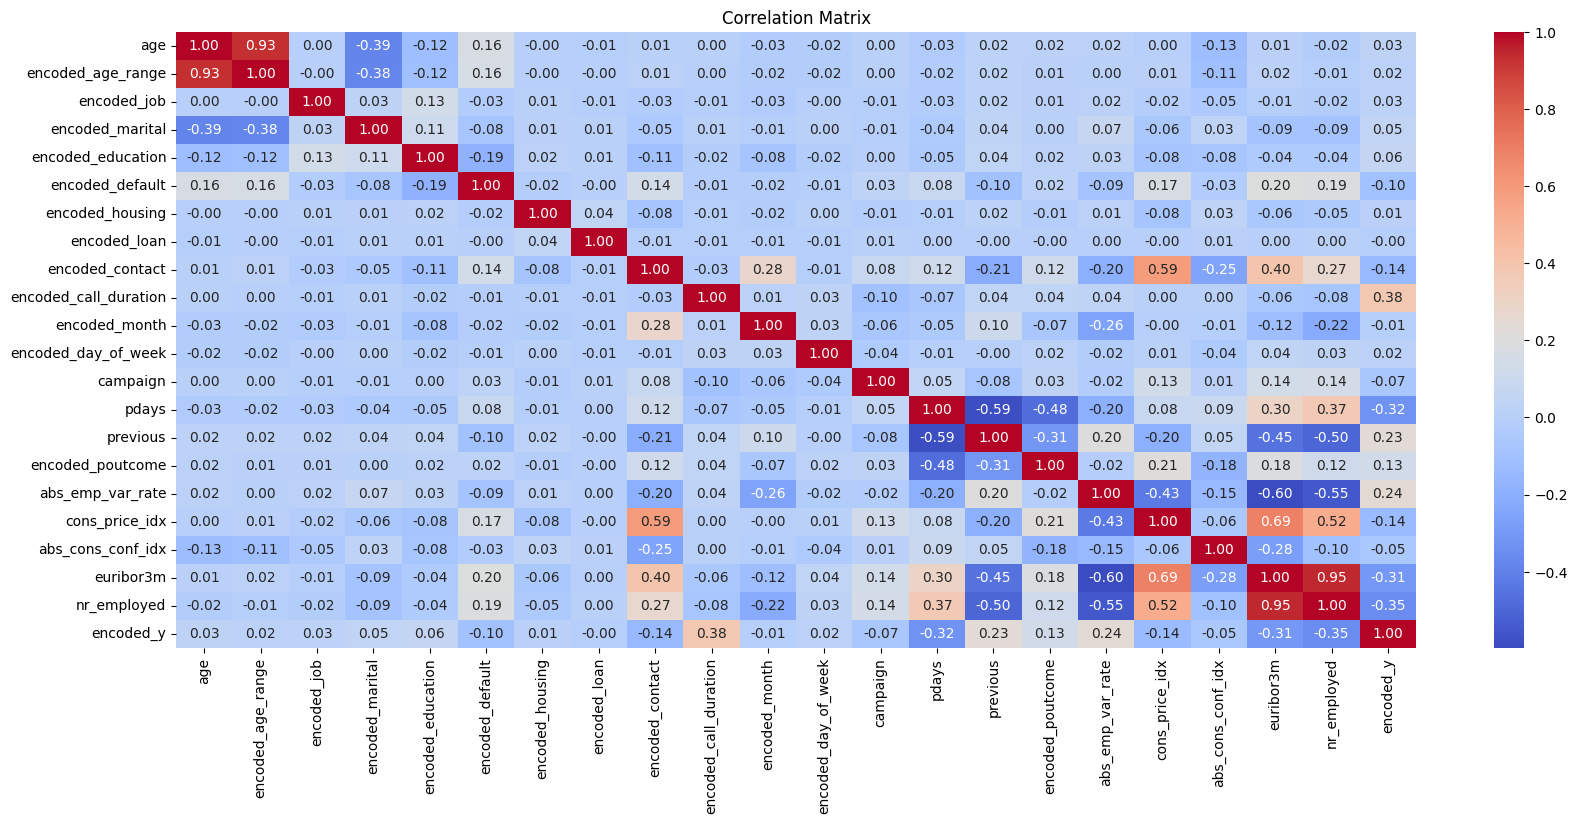

In [84]:
plt.figure(figsize=(20,8))
sns.heatmap(
    ml_marketing_prep.corr(
        method='pearson',
        numeric_only=False
    ),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Correlation Matrix")
plt.show()

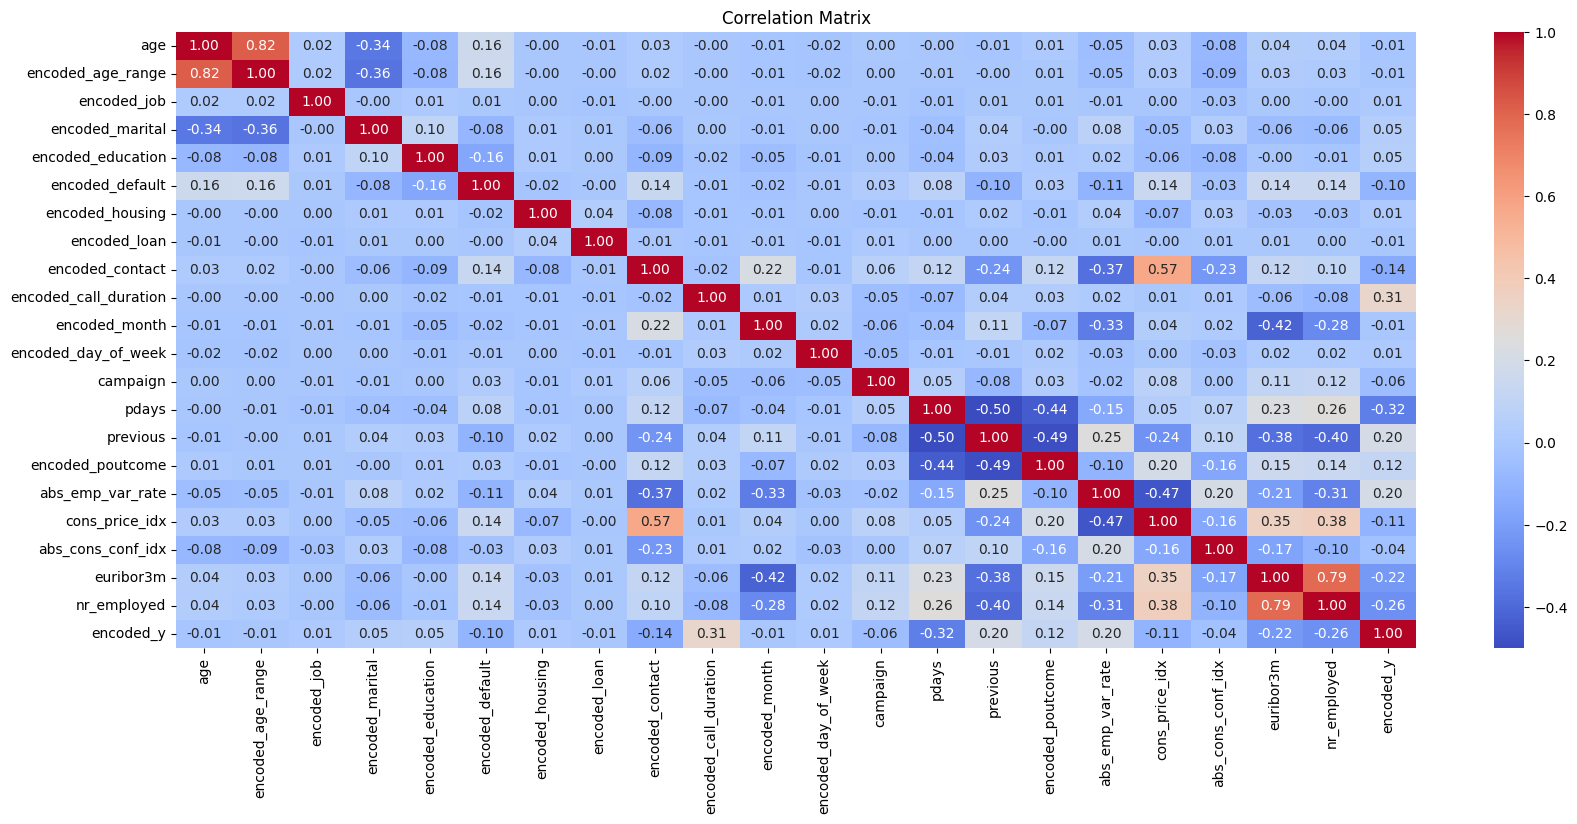

In [85]:
plt.figure(figsize=(20,8))
sns.heatmap(
    ml_marketing_prep.corr(
        method='kendall',
        numeric_only=True
    ),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Correlation Matrix")
plt.show()

In [86]:
ml_marketing_prep = ml_marketing_prep.drop(['age', 'nr_employed'], axis=1)
ml_marketing_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   encoded_age_range      41176 non-null  int64  
 1   encoded_job            41176 non-null  int64  
 2   encoded_marital        41176 non-null  int64  
 3   encoded_education      41176 non-null  int64  
 4   encoded_default        41176 non-null  int64  
 5   encoded_housing        41176 non-null  int64  
 6   encoded_loan           41176 non-null  int64  
 7   encoded_contact        41176 non-null  int64  
 8   encoded_call_duration  41176 non-null  int64  
 9   encoded_month          41176 non-null  int64  
 10  encoded_day_of_week    41176 non-null  int64  
 11  campaign               41176 non-null  int64  
 12  pdays                  41176 non-null  int64  
 13  previous               41176 non-null  int64  
 14  encoded_poutcome       41176 non-null  int64  
 15  ab

## 4. ML Model Training

In [87]:
# Load Modules, Functions, Objects
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
# from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [88]:
X = ml_marketing_prep.drop('encoded_y', axis = 1) 
y = ml_marketing_prep['encoded_y']

print(f'x shape: {X.shape} | y shape: {y.shape}')

x shape: (41176, 19) | y shape: (41176,)


In [89]:
X.head()

,encoded_age_range,encoded_job,encoded_marital,encoded_education,encoded_default,encoded_housing,encoded_loan,encoded_contact,encoded_call_duration,encoded_month,encoded_day_of_week,campaign,pdays,previous,encoded_poutcome,abs_emp_var_rate,cons_price_idx,abs_cons_conf_idx,euribor3m
0,3,3,1,0,0,0,0,1,2,6,1,1,999,0,1,1.1,93.994,36.4,4.857
1,3,7,1,3,1,0,0,1,1,6,1,1,999,0,1,1.1,93.994,36.4,4.857
2,2,7,1,3,0,2,0,1,1,6,1,1,999,0,1,1.1,93.994,36.4,4.857
3,2,0,1,1,0,0,0,1,1,6,1,1,999,0,1,1.1,93.994,36.4,4.857
4,3,7,1,3,0,0,2,1,2,6,1,1,999,0,1,1.1,93.994,36.4,4.857


In [90]:
y.tail()

41171    1
41172    0
41173    0
41174    1
41175    0
Name: encoded_y, dtype: int64

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
                                                    stratify = y, 
                                                    random_state=42)

In [92]:
# Test Six Different Algorithms in Loop and Print Accuracy
models = []
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='scale')))
models.append(('RF', RandomForestClassifier()))
# Evaluate Each Model
results = []
model_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LDA: 0.906254 (0.003842)
KNN: 0.898239 (0.003399)
DT: 0.887189 (0.003147)
NB: 0.851852 (0.005085)
SVC: 0.898057 (0.002663)
RF: 0.907711 (0.003676)


In [93]:
# Create RF classifier
dt_classifier = RandomForestClassifier()
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification Accuracy: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Classification Accuracy: 0.9093

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7308
           1       0.62      0.49      0.55       928

    accuracy                           0.91      8236
   macro avg       0.78      0.73      0.75      8236
weighted avg       0.90      0.91      0.90      8236



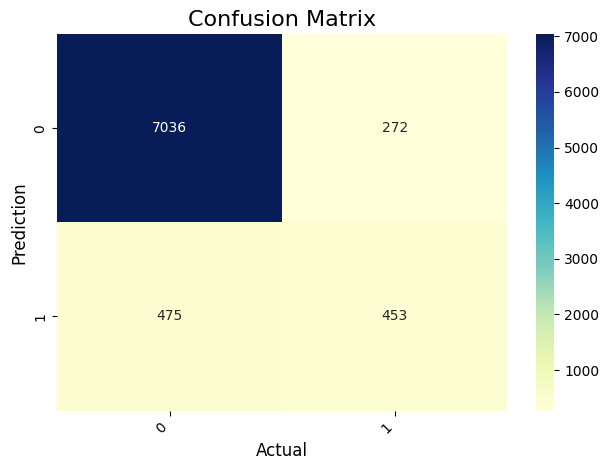

In [94]:
# Plot the Confusion Matrix in a Heatmap
cm = confusion_matrix(y_test, y_pred)
# Get Unique ‘Class’ Labels
class_labels = ml_marketing_prep['encoded_y'].unique()
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=class_labels, yticklabels=class_labels)
# Rotate x-axis Labels by 45 Degrees for Better Readability
plt.xticks(rotation=45, ha='right')
plt.ylabel('Prediction',fontsize=12)
plt.xlabel('Actual',fontsize=12)
plt.title('Confusion Matrix',fontsize=16)
# Adjust the Plot to Ensure All Labels are Visible
plt.tight_layout()
plt.show()

The best performing modal in this study wasn't accurate enough when dealing with imbalance dataset. 

## 5. Archive (Linear Regression)

In [95]:
import numpy as np

# Sample data
X = np.array(marketing_cleaned['euribor3m'])
y = np.array(marketing_cleaned['emp.var.rate'])

# Calculate means
mean_X = np.mean(X)
mean_y = np.mean(y)

# Calculate standard deviations
sd_X = np.std(X, ddof=1)
sd_y = np.std(y, ddof=1)

# Calculate correlation
correlation = np.corrcoef(X, y)[0, 1]

# Calculate slope (b1) using the formula: b1 = (correlation * sd_y) / sd_X
slope = (correlation * sd_y) / sd_X

# Calculate intercept (b0) using the formula: b0 = mean_y - slope * mean_X
intercept = mean_y - slope * mean_X

# Print the slope and intercept
print(f"Slope (b1): {slope}")
print(f"Intercept (b0): {intercept}")

# Use the manually calculated coefficients to predict y values
y_pred = intercept + slope * X

print(f"Predicted values: {y_pred}")

Slope (b1): 0.8805629307793787
Intercept (b0): -3.106855263791139
Predicted values: [ 1.17003889  1.17003889  1.17003889 ... -2.20163657 -2.20163657
 -2.20163657]


In [96]:
# Sample data
X = np.array(marketing_cleaned['duration'])
y = np.array(marketing_cleaned['nr.employed'])

# Calculate means
mean_X = np.mean(X)
mean_y = np.mean(y)

# Calculate standard deviations
sd_X = np.std(X, ddof=1)
sd_y = np.std(y, ddof=1)

# Calculate correlation
correlation = np.corrcoef(X, y)[0, 1]

# Calculate slope (b1) using the formula: b1 = (correlation * sd_y) / sd_X
slope = (correlation * sd_y) / sd_X

# Calculate intercept (b0) using the formula: b0 = mean_y - slope * mean_X
intercept = mean_y - slope * mean_X

# Print the slope and intercept
print(f"Slope (b1): {slope}")
print(f"Intercept (b0): {intercept}")

# Use the manually calculated coefficients to predict y values
y_pred = intercept + slope * X

print(f"Predicted values: {y_pred}")

Slope (b1): -0.012447065581045254
Intercept (b0): 5170.2501437174815
Predicted values: [5167.0014596  5168.39553095 5167.4371069  ... 5167.89764832 5164.74854073
 5167.27529504]


# Reference Sources:
- https://ishanjainoffical.medium.com/choosing-the-right-correlation-pearson-vs-spearman-vs-kendalls-tau-02dc7d7dd01d
- https://datascience.stackexchange.com/questions/64260/pearson-vs-spearman-vs-kendall